In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [ ]:
# y = [-1,1]
# y` = sign(W*X+b)
# W  <- W + lr(y-y`)X
# decision boundry  y = 1/w2(b+w1+x1)

In [ ]:
import numpy as np

In [ ]:
class Data(Dataset):
  def __init__(self,length):
      self.x1 = torch.normal(mean=2.0,std=0.5**2,size=(length,))
      self.xx1 = torch.normal(mean=0.0,std=0.5**2,size=(length,))
      self.x2 = torch.normal(mean=0.0,std=0.25**2,size=(length,))
      self.xx2 = torch.normal(mean=2.0,std=0.25**2,size=(length,))
      self.xx = torch.column_stack([self.x1, self.xx1])
      self.xxx = torch.column_stack([self.x2, self.xx2])
      self.x = torch.vstack([self.xx,self.xxx])

      self.y1 = torch.tensor([1]*100)
      self.y2 = torch.tensor([-1]*100)
      self.y = torch.concat([self.y1, self.y2])
  def __len__(self):
    return len(self.x)
  
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

In [ ]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])

torch.vstack([a, b])

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
train_dataset = Data(100)

val_dataset = Data(50)

train_dataset[0]

(tensor([1.9876, 0.0281]), tensor(1))

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=1,shuffle=True)

val_loader = DataLoader(dataset= val_dataset,
                          batch_size= 1)

dataloaders_dict = {
    "train": train_loader,
    "val": val_loader,
}

In [ ]:
class perceptron(nn.Module):
  def __init__(self):
    super(perceptron,self).__init__()
    self.lay1 = nn.Linear(2,1)

  def forward(self,input):
      return torch.sign(self.lay1(input))

In [ ]:
net = perceptron()
net.train()

perceptron(
  (lay1): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss(())
# optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def train(dataloader, model, critertion, lr,num_epochs):
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-------------------")
    
    for phase in ['train', 'val']:
      if phase == 'train':
        net.train()
      else:
        net.eval()

      if (epoch == 0) and (phase == 'train'):
        continue
      cnt = 0
      err = 0
      for x,y in tqdm(dataloader[phase]):
        out = model(x)
        err += y - out    
        if phase == 'train':
          with torch.no_grad():
            model.lay1.weight = torch.nn.Parameter(model.lay1.weight[0] + lr*err*x)
            model.lay1.bias = torch.nn.Parameter(model.lay1.bias[0] + lr*err)
        cnt += 1
      print(phase,"Loss:",err.item()/len(dataloader[phase].dataset))



In [ ]:
epochs = 200
train(dataloaders_dict, net, criterion, 0.01, 10)

Epoch 1/10
-------------------


100%|██████████| 100/100 [00:00<00:00, 4818.55it/s]


val Loss: 0.0
Epoch 2/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 5072.60it/s]


train Loss: -0.02


100%|██████████| 100/100 [00:00<00:00, 4995.30it/s]


val Loss: 1.6
Epoch 3/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 4126.87it/s]


train Loss: -0.03


100%|██████████| 100/100 [00:00<00:00, 4964.50it/s]


val Loss: 1.0
Epoch 4/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 3729.33it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 4578.43it/s]


val Loss: 1.0
Epoch 5/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 3320.96it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 4845.66it/s]


val Loss: 1.0
Epoch 6/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 2803.88it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 5081.17it/s]


val Loss: 1.0
Epoch 7/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 3765.63it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 6126.20it/s]


val Loss: 1.0
Epoch 8/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 4786.57it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 4902.47it/s]


val Loss: 1.0
Epoch 9/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 3861.48it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 4748.45it/s]


val Loss: 1.0
Epoch 10/10
-------------------


100%|██████████| 200/200 [00:00<00:00, 4081.73it/s]


train Loss: 0.0


100%|██████████| 100/100 [00:00<00:00, 6335.81it/s]

val Loss: 1.0


In [ ]:
X1 = np.array([train_dataset[i][0].detach().numpy() for i in range(100)])
X2 = np.array([train_dataset[i][0].detach().numpy() for i in range(100,200)])

In [ ]:
x = np.arange(0,2,0.1,dtype=float)
w = list(net.parameters())[0]
b = list(net.parameters())[1].item()
w1 = w[0,0].item()
w2 = w[0,1].item()


y = -1.0/w2*(b+w1*x)
print(w1,w2,b)

2.1264259815216064 -1.102341890335083 0.03274405375123024


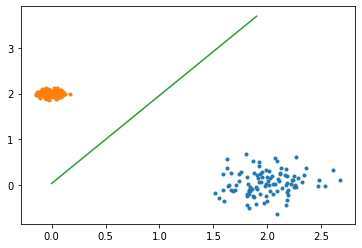

In [ ]:
plt.plot(X1[:,0], X1[:,1], '.', label='Group1')
plt.plot(X2[:,0], X2[:,1], '.', label='Group2')
plt.plot(x,y)